In [1]:
# Lab 9 XOR
import torch

1. input -> network -> output
2. cross entropy loss
3. backpropagation
4. sigmoid => 중간에서 구하면 gradient값이 어느정도 잘 나온다, but 양끝에서 구하면 엄청나게 작은값이다. 즉 소멸되어 vanishing Gradient가 된다

ReLU
f(x) = max(0,x) 음수면 0출력 0보다 크면 x를 출력
=> vanishing gradient가 없다.  아예 0이면 사라질수도 있다

x = torch.nn.sigmoid(x)
x = torch.nn.relu(x)

torch.optim!!

optimizers: 
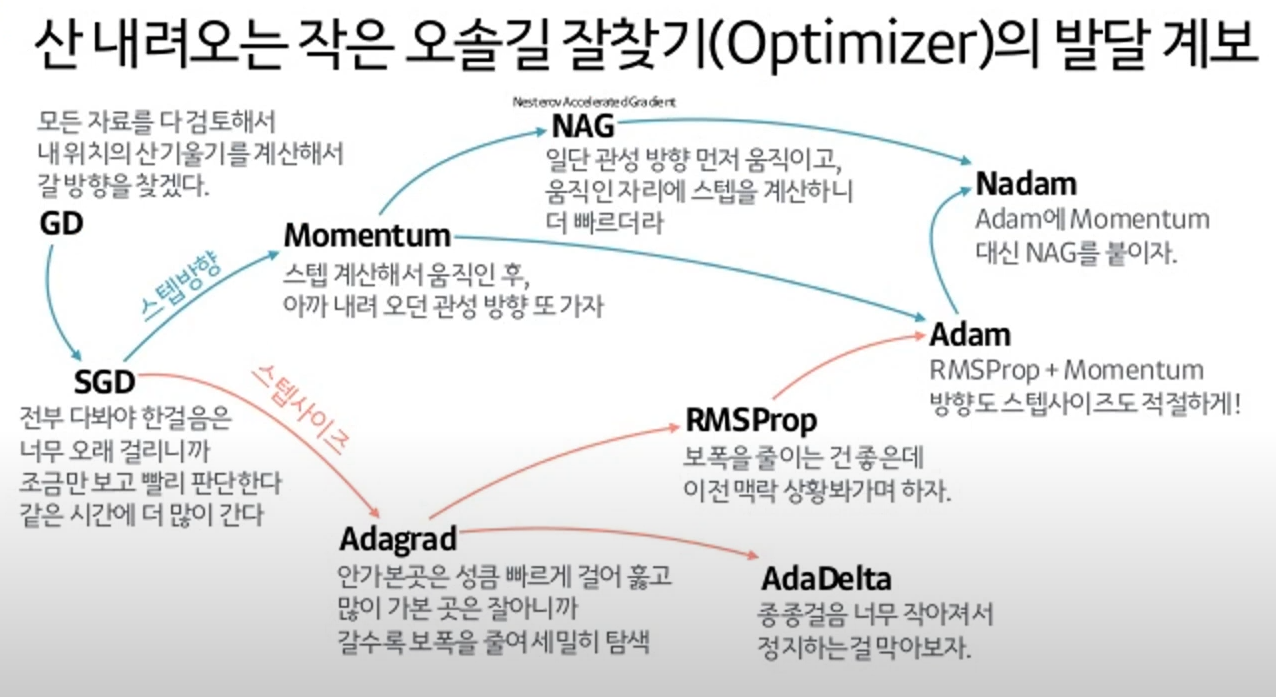

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
import torchvision.datasets as dsets

mnist_train = dsets.MNIST(root = "MNIST_data/", train=True, transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(),
                         download=True)
data_loader = torch.utils.DataLoader(DataLoader=mnist_train, batch_size = batch_size,
                                     shuffle=True, drop_last = True)
for epoch in range(training_epochs):
  for X,Y in data_loader:
    X = X.view(01,28*28).to(device)

#mnist_softmax
learning_rate = 0.01
training_epochs = 15
batch_size = 100

linear = torch.nn.Linear(784, 10, bias=True).to(device)
torch.nn.init.normal_(linear.weight)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr = learning_rate)
#Train
total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch

In [ ]:
# nn layers
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [ ]:
# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid).to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [ ]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.6948983669281006
100 0.6931558847427368
200 0.6931535005569458
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931362152099609
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931196451187134
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931085586547852
2400 0.693105161190033
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930880546569824
2900 0.6930825710296631
3000 0.6930763125419617
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.693041205406189
3500 0.693028450012207
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929729580879211
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928650140762329
4200 0.

In [ ]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[1.1168354e-04]
 [9.9982882e-01]
 [9.9984241e-01]
 [1.8533420e-04]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0
